In [1]:
import pandas_datareader as pdr
import csv
import pandas as pd

In [2]:
with open('BTC-USD.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        print(row)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2017-06-01', '2288.330078', '2448.389893', '2288.330078', '2407.879883', '2407.879883', '1653180032']
['2017-06-02', '2404.030029', '2488.550049', '2373.320068', '2488.550049', '2488.550049', '1317030016']
['2017-06-03', '2493.719971', '2581.909912', '2423.570068', '2515.350098', '2515.350098', '1514950016']
['2017-06-04', '2547.790039', '2585.889893', '2452.540039', '2511.810059', '2511.810059', '1355120000']
['2017-06-05', '2512.399902', '2686.810059', '2510.219971', '2686.810059', '2686.810059', '1369309952']
['2017-06-06', '2690.840088', '2999.909912', '2690.840088', '2863.199951', '2863.199951', '2089609984']
['2017-06-07', '2869.379883', '2869.379883', '2700.560059', '2732.159912', '2732.159912', '1517709952']
['2017-06-08', '2720.489990', '2815.300049', '2670.949951', '2805.620117', '2805.620117', '1281170048']
['2017-06-09', '2807.439941', '2901.709961', '2795.620117', '2823.810059', '2823.810059', '1348950016']


In [3]:
my_file = 'BTC-USD.csv'

In [4]:
df = pd.read_csv(my_file,index_col=None)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,2288.330078,2448.389893,2288.330078,2407.879883,2407.879883,1653180032
1,2017-06-02,2404.030029,2488.550049,2373.320068,2488.550049,2488.550049,1317030016
2,2017-06-03,2493.719971,2581.909912,2423.570068,2515.350098,2515.350098,1514950016
3,2017-06-04,2547.790039,2585.889893,2452.540039,2511.810059,2511.810059,1355120000
4,2017-06-05,2512.399902,2686.810059,2510.219971,2686.810059,2686.810059,1369309952


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
1823,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
1824,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274
1825,2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634
1826,2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341


In [7]:
df1 = df.reset_index()['Adj Close']

In [8]:
df1.shape

(1827,)

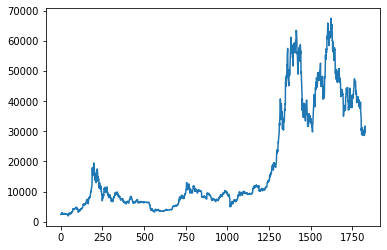

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [10]:
#LSTM is sensitive to the scale of the data. So we will apply MinMax Scaler
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.00728339]
 [0.00851242]
 [0.00892073]
 ...
 [0.45395992]
 [0.45496423]
 [0.42459675]]


In [13]:
#Splitting data into train and test split
training_size = int(len(df1)*0.8)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]


In [14]:
training_size, test_size

(1461, 366)

In [15]:
len(train_data), len(test_data)

(1461, 366)

In [16]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [18]:
print(X_train)

[[0.00728339 0.00851242 0.00892073 ... 0.04063714 0.04067918 0.03502491]
 [0.00851242 0.00892073 0.0088668  ... 0.04067918 0.03502491 0.03498392]
 [0.00892073 0.0088668  0.01153298 ... 0.03502491 0.03498392 0.03341286]
 ...
 [0.76510477 0.75795619 0.82207149 ... 0.55566827 0.56925781 0.55619764]
 [0.75795619 0.82207149 0.82529203 ... 0.56925781 0.55619764 0.51446259]
 [0.82207149 0.82529203 0.84723736 ... 0.55619764 0.51446259 0.49798501]]


In [19]:
print(X_test.shape), print(ytest.shape)

(265, 100)
(265,)


(None, None)

In [20]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
#Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [22]:
#50 Nodes 
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-09-02 12:41:16.560902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-02 12:41:16.561132: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
#100 input, 50 output 
#50 50 . 1 1 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [24]:
X_train[:100]

array([[[0.00728339],
        [0.00851242],
        [0.00892073],
        ...,
        [0.04063714],
        [0.04067918],
        [0.03502491]],

       [[0.00851242],
        [0.00892073],
        [0.0088668 ],
        ...,
        [0.04067918],
        [0.03502491],
        [0.03498392]],

       [[0.00892073],
        [0.0088668 ],
        [0.01153298],
        ...,
        [0.03502491],
        [0.03498392],
        [0.03341286]],

       ...,

       [[0.04063714],
        [0.04067918],
        [0.03502491],
        ...,
        [0.23592758],
        [0.22058256],
        [0.22295623]],

       [[0.04067918],
        [0.03502491],
        [0.03498392],
        ...,
        [0.22058256],
        [0.22295623],
        [0.24036867]],

       [[0.03502491],
        [0.03498392],
        [0.03341286],
        ...,
        [0.22295623],
        [0.24036867],
        [0.26764749]]])

In [25]:
model.fit(X_train, y_train, validation_data=(X_test,ytest), epochs=20, batch_size=64, verbose=1)

Epoch 1/20


2022-09-02 12:41:18.003890: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-02 12:41:19.667017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:19.956820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:21.216758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:21.380950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:22.419795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:23.530490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

22/22 [==============================] - ETA: 0s - loss: 0.0166

2022-09-02 12:41:26.566253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:26.656590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:26.754718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:26.857368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 9s 151ms/step - loss: 0.0166 - val_loss: 0.0161
Epoch 2/20
22/22 [==============================] - 1s 62ms/step - loss: 0.0038 - val_loss: 0.0107
Epoch 3/20
22/22 [==============================] - 1s 61ms/step - loss: 0.0031 - val_loss: 0.0093
Epoch 4/20
22/22 [==============================] - 1s 61ms/step - loss: 0.0027 - val_loss: 0.0045
Epoch 5/20
22/22 [==============================] - 1s 62ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 6/20
22/22 [==============================] - 1s 66ms/step - loss: 0.0019 - val_loss: 0.0042
Epoch 7/20
22/22 [==============================] - 2s 77ms/step - loss: 0.0018 - val_loss: 0.0059
Epoch 8/20
22/22 [==============================] - 1s 62ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 9/20
22/22 [==============================] - 1s 67ms/step - loss: 0.0017 - val_loss: 0.0062
Epoch 10/20
22/22 [==============================] - 1s 62ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 11/20
22/22 [

In [27]:
import tensorflow as tf

In [28]:
#lets do the prediction and check the performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2022-09-02 12:41:55.438588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:55.526477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-02 12:41:55.634273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 3/43 [=>............................] - ETA: 1s 

2022-09-02 12:41:55.743593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 73ms/step


In [29]:
#Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
#Calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

17732.87092252757

In [31]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))


45106.48793151957

1827
longitud de predict plot: 1
predict plot after nan is: [[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
[[ 4324.5166]
 [ 4310.3076]
 [ 4284.477 ]
 ...
 [37504.227 ]
 [37136.617 ]
 [36804.71  ]]
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


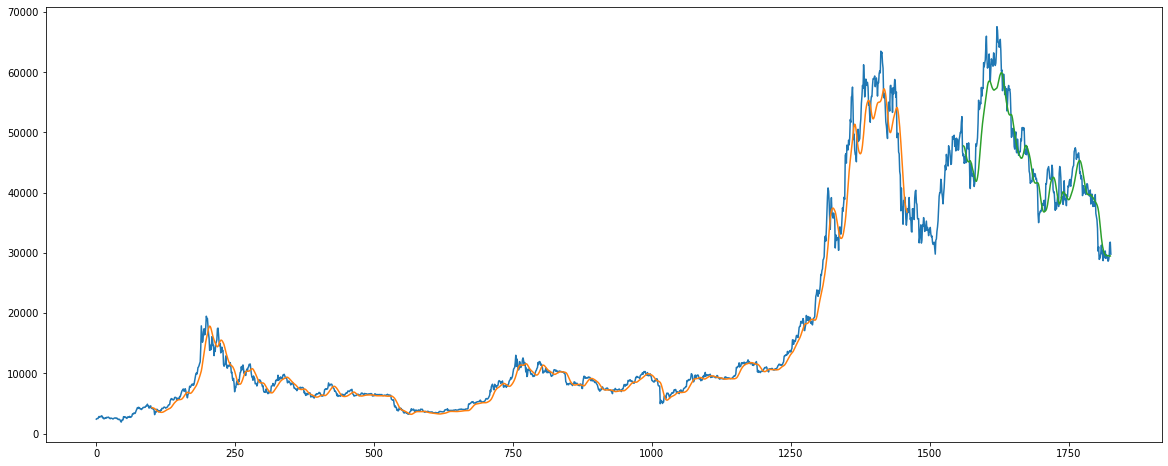

<Figure size 2880x576 with 0 Axes>

In [48]:
#PREDICT THE TEST DATA AND PLOT THE OUTPUT
#Plotting 
#Shift train predictions for plotting
print(len(df1))
look_back = 100
trainPredicPlot = numpy.empty_like(df1)
print(f'longitud de predict plot: {len(trainPredicPlot[-2])}')
trainPredicPlot[:, :] = np.nan
print(f'predict plot after nan is: {trainPredicPlot}')

trainPredicPlot[look_back:len(train_predict)+look_back, :] = train_predict

print(train_predict)
print(trainPredicPlot)
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredicPlot)
plt.plot(testPredictPlot)
plt.show()

#Test data predicted output is the green colour
#Complete dataset is the blue colour
#Training dataset(how the prediction has gone) is the orange
plt.rcParams['figure.figsize'] = (40,8)
plt.savefig('LSTM.png')

In [33]:
#PREDICT THE FUTURE 30 DAYS AND PLOT THE OUTPUT
len(test_data)

366

In [34]:
x_input = test_data[266:].reshape(1, -1)

In [35]:
x_input.shape

(1, 100)

In [36]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()